In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
# Reading csv file dd

In [3]:
import pandas as pd
dataframe=pd.read_csv(r'E:\project_stuff\datasets\OSERVATION.csv')
dataframe.head()

,Load_KG,Load,Area,Stress,Length,Elongation,Strain
0,1,784.8,101.23,7.75,56.56,0,0.00
1,4,3139.2,101.23,31.01,56.56,2,0.04
2,7,5493.6,101.23,54.27,56.56,4,0.07
3,13,10202.4,101.23,100.78,56.56,6,0.11
4,18,14126.4,101.23,139.55,56.56,8,0.14


In [ ]:
# checking on dataset properties

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Load_KG     21 non-null     int64  
 1   Load        21 non-null     float64
 2   Area        21 non-null     float64
 3   Stress      21 non-null     float64
 4   Length      21 non-null     float64
 5   Elongation  21 non-null     int64  
 6   Strain      21 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.3 KB


In [ ]:
# statistical data details

In [13]:
dataframe.describe()

,Load_KG,Load,Area,Stress,Length,Elongation,Strain
count,21.000000,21.000000,2.100000e+01,21.000000,2.100000e+01,21.000000,21.000000
mean,42.142857,33073.714286,1.012300e+02,326.718095,5.656000e+01,20.000000,0.335714
std,24.511805,19236.864357,1.456179e-14,190.031368,2.184269e-14,12.409674,0.203779
min,1.000000,784.800000,1.012300e+02,7.750000,5.656000e+01,0.000000,0.000000
25%,25.000000,19620.000000,1.012300e+02,193.820000,5.656000e+01,10.000000,0.180000
50%,43.000000,33746.400000,1.012300e+02,333.360000,5.656000e+01,20.000000,0.320000
75%,62.000000,48657.600000,1.012300e+02,480.660000,5.656000e+01,30.000000,0.500000
max,75.000000,58860.000000,1.012300e+02,581.450000,5.656000e+01,40.000000,0.670000


In [15]:
dataframe.dtypes

Load_KG         int64
Load          float64
Area          float64
Stress        float64
Length        float64
Elongation      int64
Strain        float64
dtype: object

In [ ]:
# checking for nulls

In [5]:
dataframe.isnull().sum()

Load_KG       0
Load          0
Area          0
Stress        0
Length        0
Elongation    0
Strain        0
dtype: int64

In [ ]:
# defining X and Y variables. X is for dates and Y is for observations

In [19]:
# Define features (X) and target (y)
X = dataframe[['Load']]
y = dataframe['Elongation']


In [ ]:
#now lets dive into traing and testing part, we need to splite the data into traing and testing datasets. 
#80% of the data will be used for training. 20% of the data will be used for testing.

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Now here onwards actual process starts. 
# starting with initializing and training the model. 
# calculating mean error and
# finaly obtain requred results from trainined model.


In [23]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
# Make predictions
y_pred = model.predict(X_test)

Mean Absolute Error: 0.6762797547636632


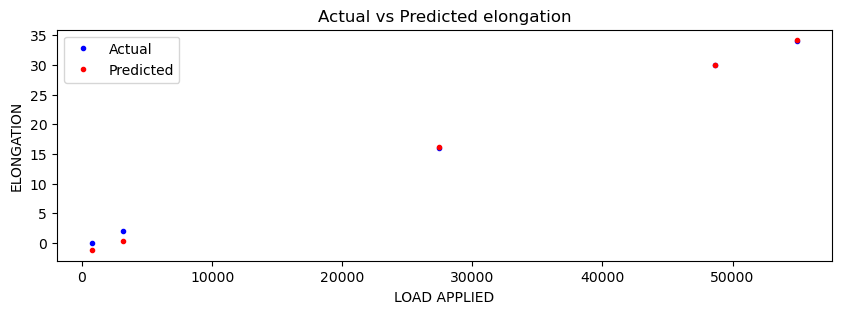

In [31]:
# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
# Plot actual vs predicted values
plt.figure(figsize=(10, 3))
plt.plot(X_test, y_test, 'b.', label='Actual')
plt.plot(X_test, y_pred, 'r.', label='Predicted')
plt.xlabel('LOAD APPLIED')
plt.ylabel('ELONGATION')
plt.title('Actual vs Predicted elongation')
plt.legend()
plt.show()


In [35]:
# Predicting elongation for given load value
load = [60661]
load_applied=np.array(load).reshape(-1,1)


In [37]:
# elongation = np.array([load + i for i in range(1, 5)]).reshape(-1, 1)
elongation=np.array([[x + i for x in load_applied] for i in range(1, 5)])
expected_elongation = model.predict(load_applied)

C:\Users\Vinayak\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
#Display the predictions
print("\nExpected Elongation:")
for load, elongation in zip(load_applied.flatten(), expected_elongation):
 print(f"Load Applied(N): {load_applied}, Expected Elongation (mm): {expected_elongation}")


Expected Elongation:
Load Applied(N): [[60661]], Expected Elongation (mm): [37.91975182]
